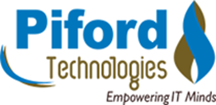

In [41]:
# !python -m pip install --upgrade pip

# !pip install tensorflow==2.3.1 

!pip install tensorboard==2.4.1
!pip install torch  

     -------------------------------------- 10.6/10.6 MB 948.5 kB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 665.4 kB/s eta 0:00:00
     ------------------------------------ 152.9/152.9 kB 654.6 kB/s eta 0:00:00
     ------------------------------------ 422.5/422.5 kB 613.5 kB/s eta 0:00:00
     ------------------------------------ 781.3/781.3 kB 759.7 kB/s eta 0:00:00
     ------------------------------------ 151.7/151.7 kB 756.4 kB/s eta 0:00:00


In [2]:
import torch # YOLOv5 implemented using pytorch

In [2]:
from IPython.display import Image #this is to render predictions

In [13]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
%cd yolov5

C:\__Sandbox\python\university\dip\model train\yolov5


In [15]:
!pip install -r requirements.txt

     ------------------------------------ 184.3/184.3 kB 657.0 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.1
    Uninstalling setuptools-63.4.1:
      Successfully uninstalled setuptools-63.4.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


# Divide the dataset in train and val folder. 

In [5]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'C:/__Sandbox/python/university/dip/model train/dataset/images/train'
valPath = 'C:/__Sandbox/python/university/dip/model train/dataset/images/val'
crsPath = 'C:/__Sandbox/python/university/dip/model train/data/ts/' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/__Sandbox/python/university/dip/model train/data/ts/'

In [6]:
# C:\__Sandbox\python\university\dip\model train\dataset\labels
trainimagePath = 'C:/__Sandbox/python/university/dip/model train/dataset/images/train'
trainlabelPath = 'C:/__Sandbox/python/university/dip/model train/dataset/labels/train'
valimagePath = 'C:/__Sandbox/python/university/dip/model train/dataset/images/val'
vallabelPath = 'C:/__Sandbox/python/university/dip/model train/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 




NameError: name 'countForTrain' is not defined

# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 

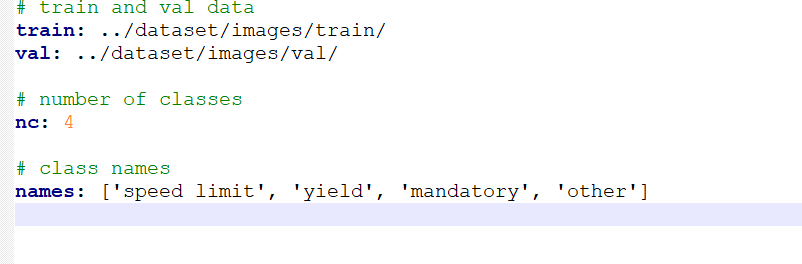

In [8]:
!python train.py --img 400 --batch 5 --epochs 500 --data dataset.yaml --weights yolov5s.pt --cache

requirements: C:\__Sandbox\python\university\dip\model train\requirements.txt not found, check failed.


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=5, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\__Sandbox\python\university\dip\model': No such file or directory
YOLOv5  2023-5-11 Python-3.9.13 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor

In [66]:
!pip install --upgrade "protobuf<=3.20.1"


     -------------------------------------- 904.1/904.1 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.0
    Uninstalling protobuf-4.23.0:
      Successfully uninstalled protobuf-4.23.0


## At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

## Explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

In [68]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 5648.

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

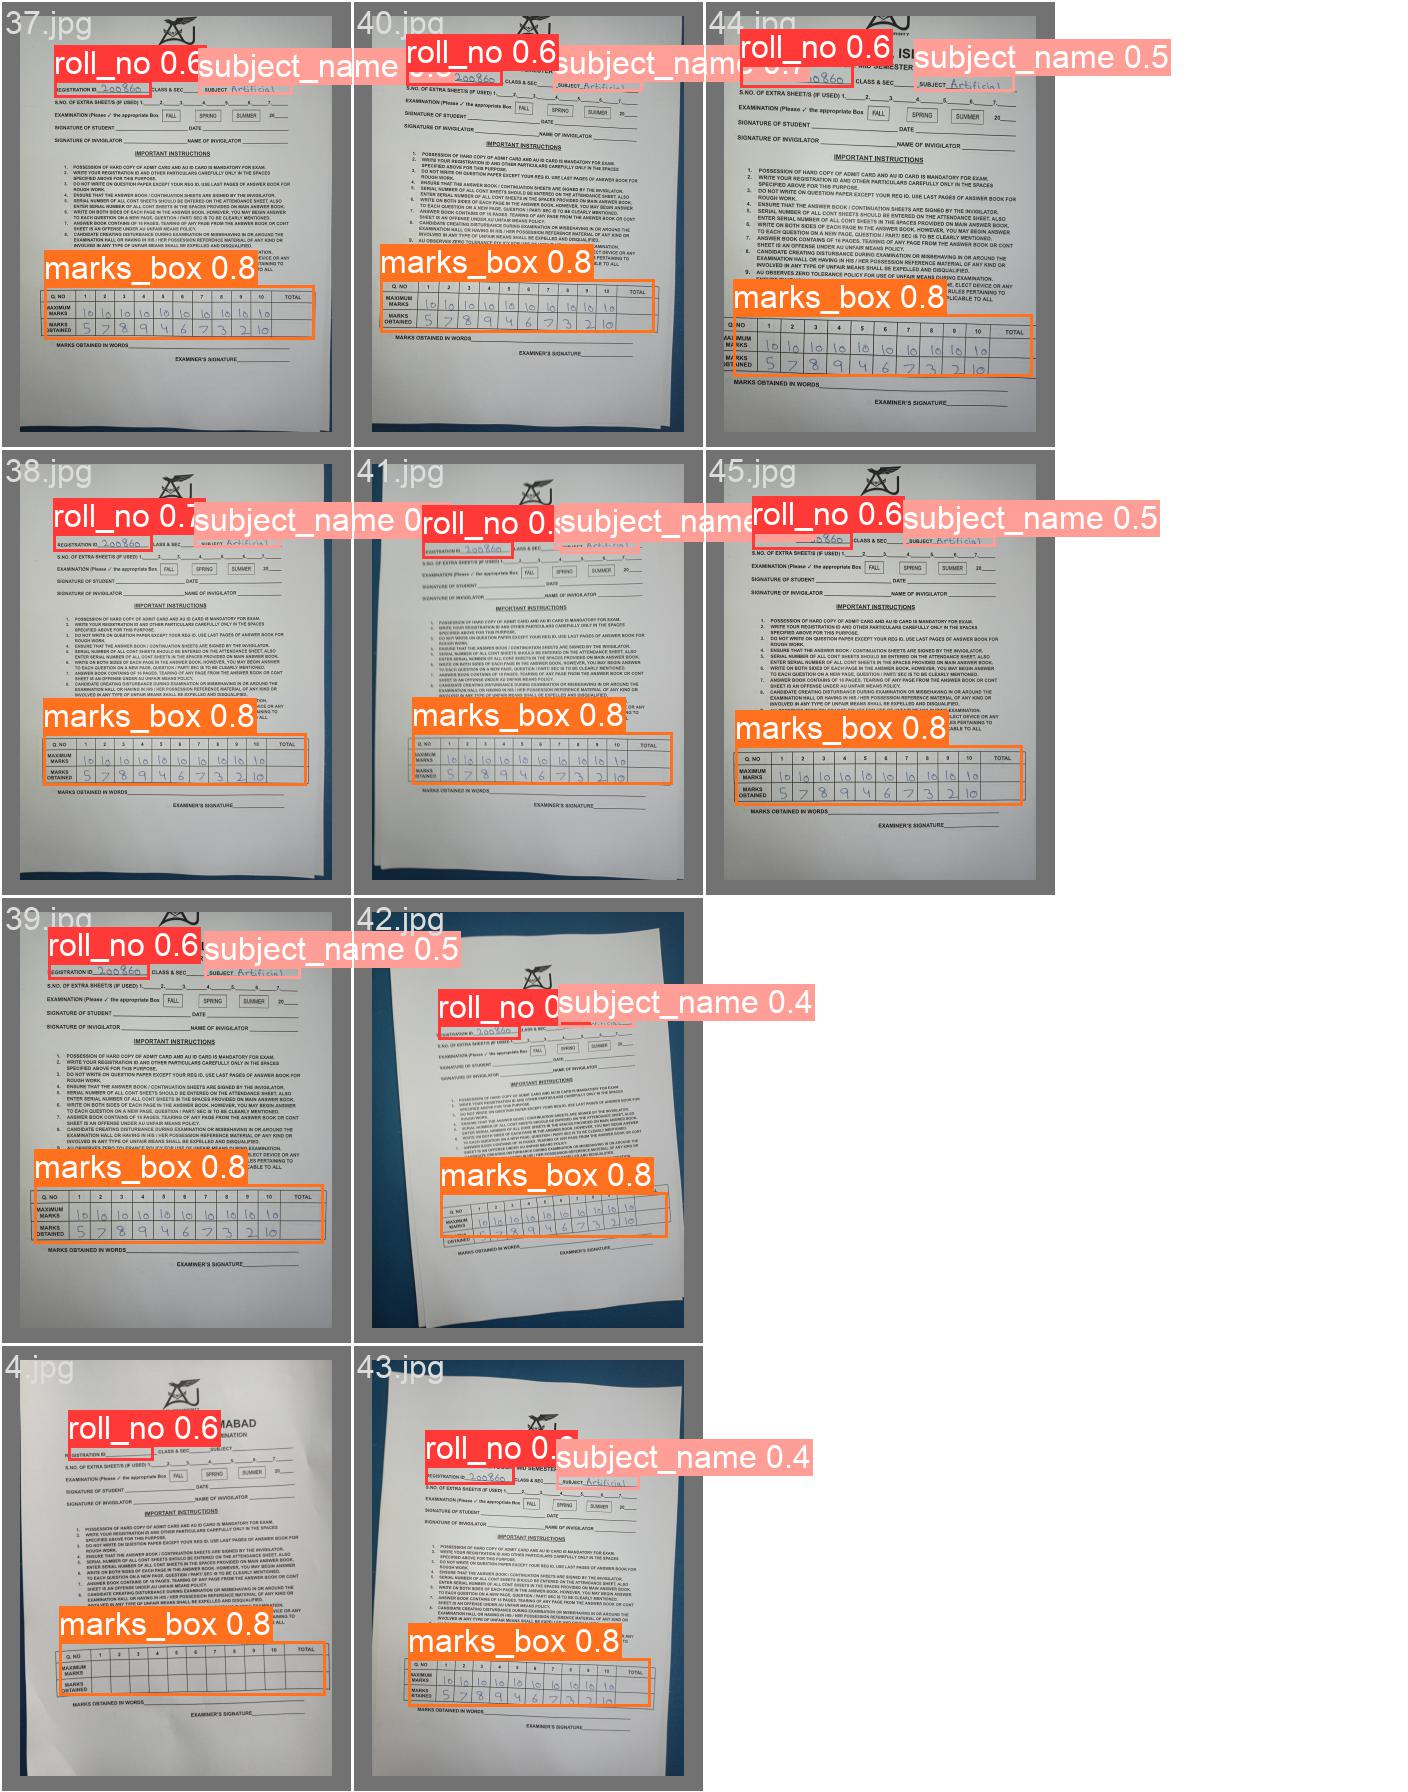

In [10]:
Image(filename='runs/train/exp3/val_batch1_pred.jpg', width=1000)


Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes. 

You’ll be implementing the detect.py script with the best.pt weights and image dimensions of 416x416 pixels (it’s really important to comply with that). The results will be saved to runs/detect/exp. To display the results, run the following code:

In [7]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python detect.py --source runs/train/exp3/90.jpg --weights runs/train/exp3/weights/best.pt

requirements: C:\__Sandbox\python\university\dip\model train\requirements.txt not found, check failed.
The size of the image is [640, 640]


detect: weights=['runs/train/exp3/weights/best.pt'], source=runs/train/exp3/90.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\__Sandbox\python\university\dip\model': No such file or directory
YOLOv5  2023-5-11 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\__Sandbox\python\university\dip\model train\yolov5\runs\train\exp3\90.jpg: 640x480 1 roll_no, 1 subject_name, 1 marks_box, 431.6ms
Speed: 2.0ms pre-process, 431.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp11


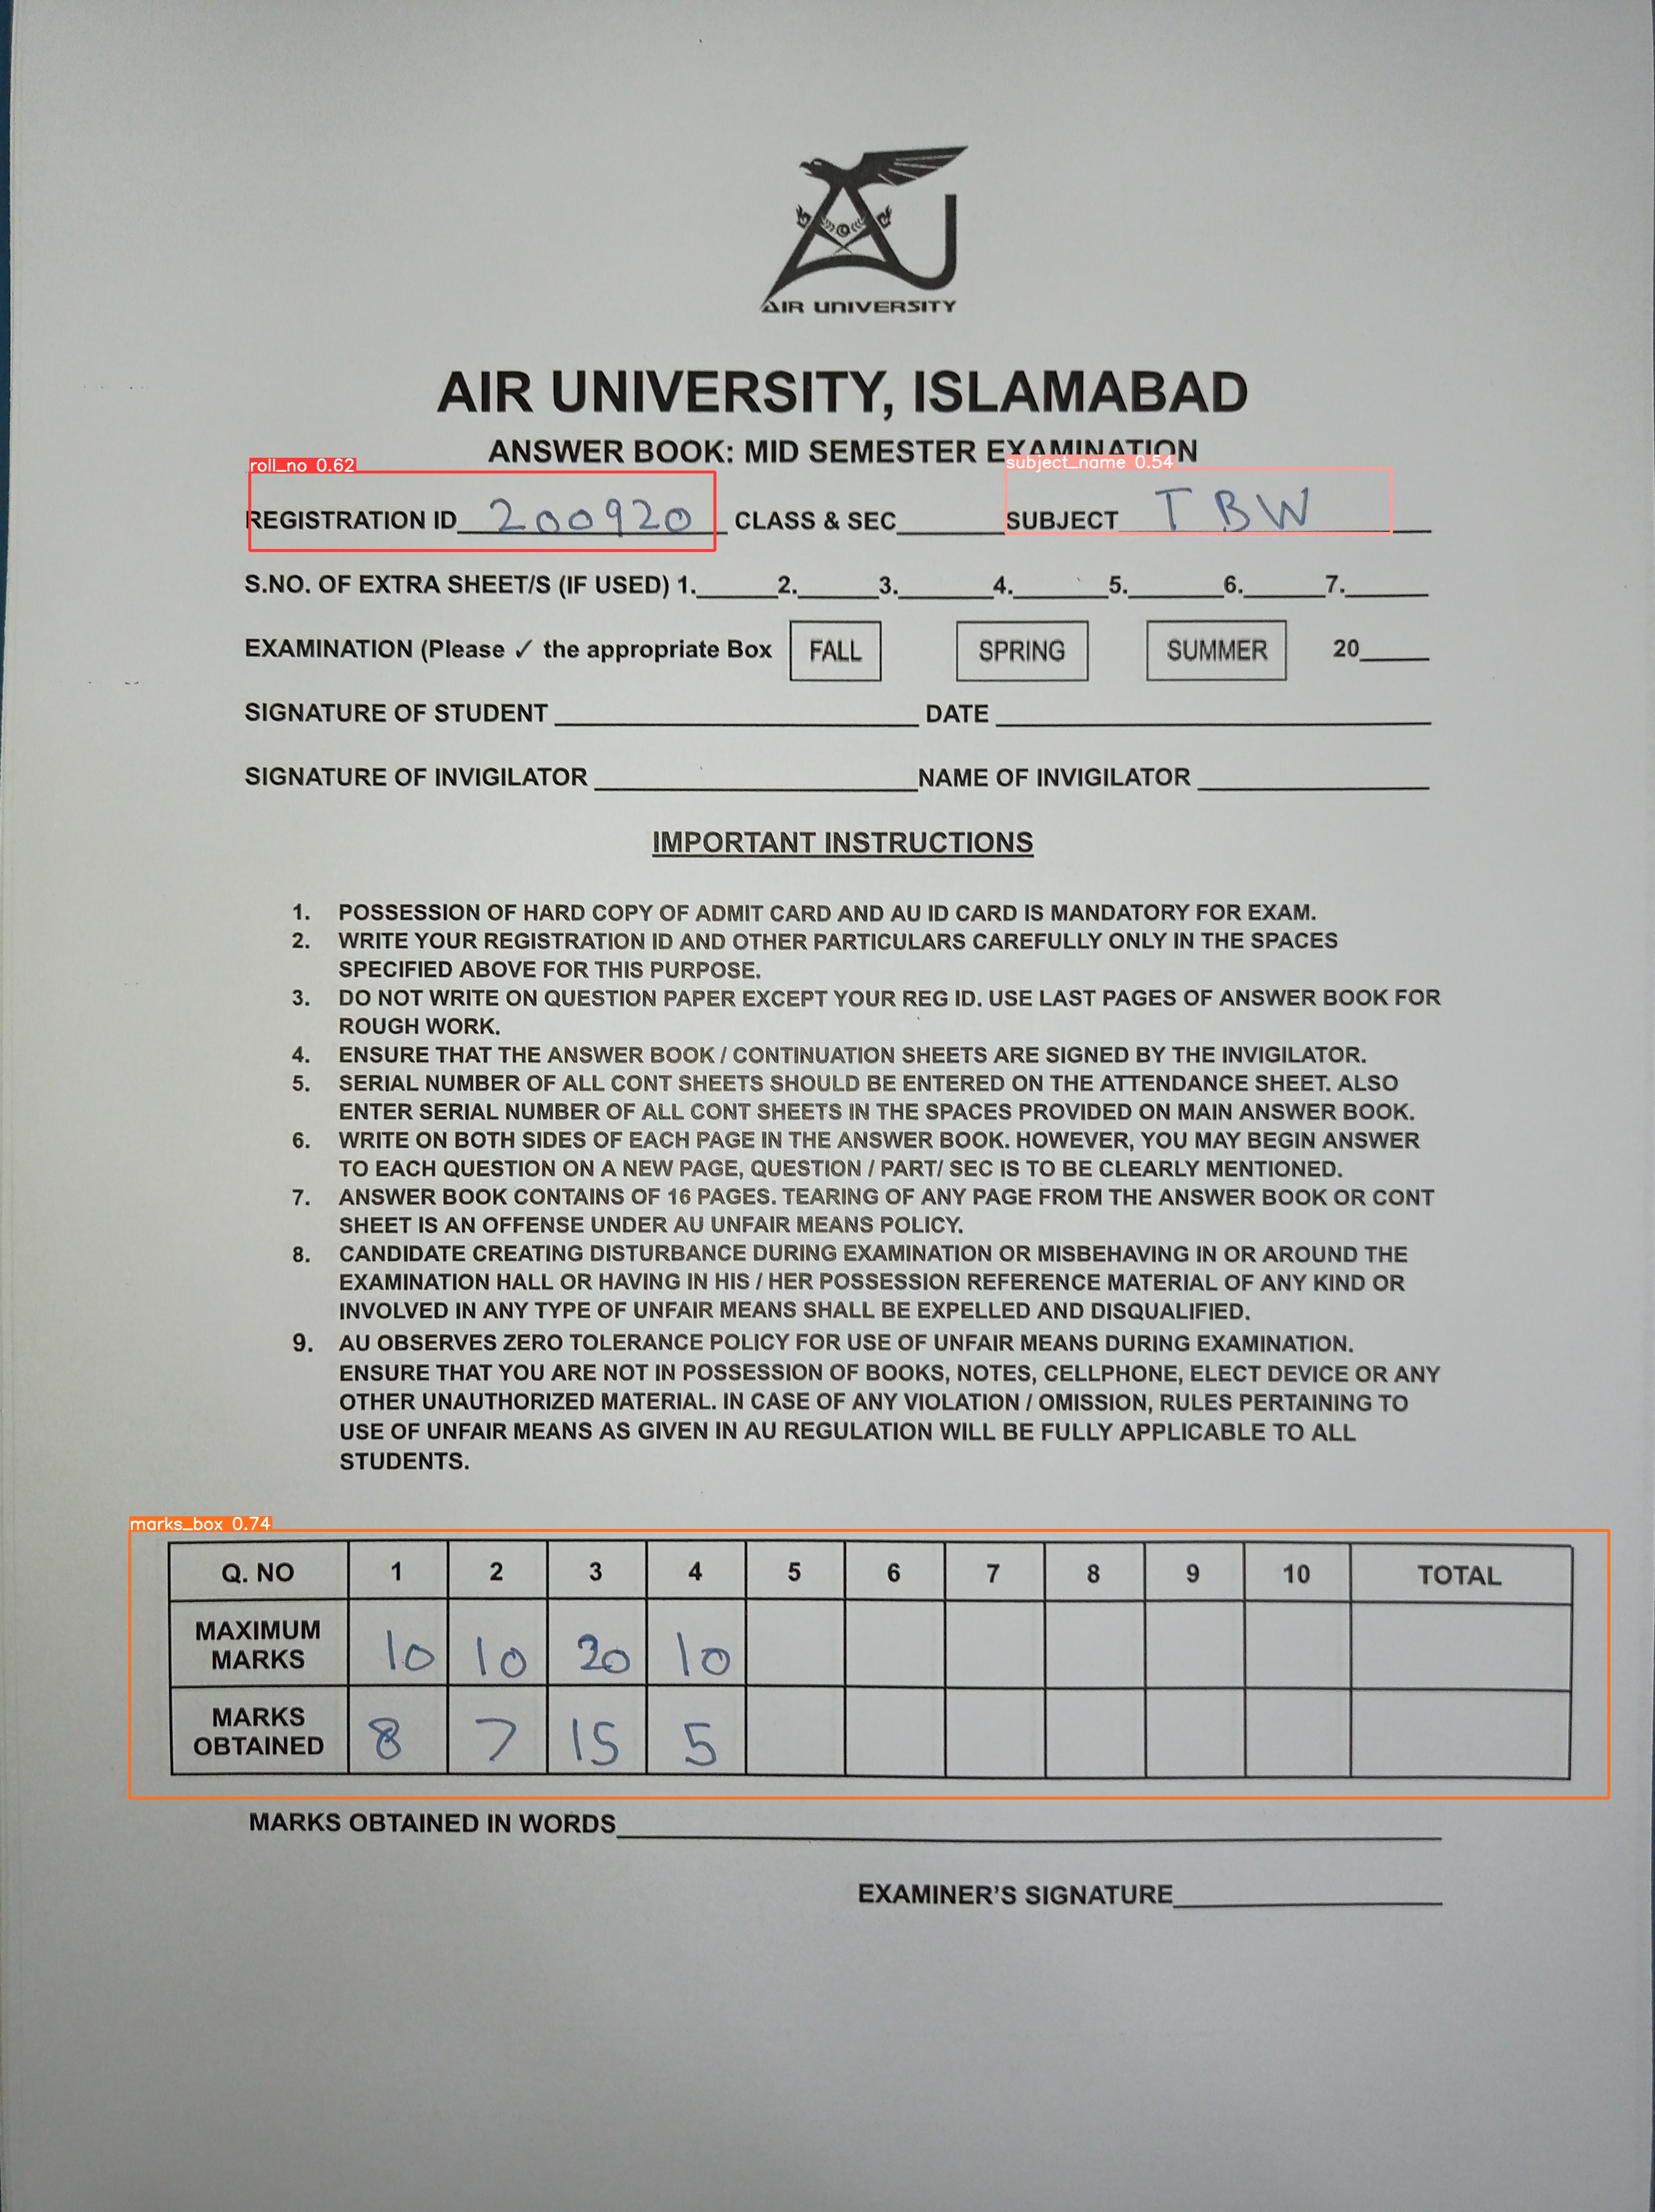

In [8]:
Image(filename='runs/detect/exp11/90.jpg', width=416)